In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic')

In [15]:
display(df)
#df.info()
#df.describe()

,survived,pclass,sex,age,fare,embarked,who,adult_male,embark_town,parentes
0,0,3,male,22.0,7.25,S,man,True,Southampton,1
1,1,1,female,38.0,71.28,C,woman,False,Cherbourg,1
2,1,3,female,26.0,7.92,S,woman,False,Southampton,0
3,1,1,female,35.0,53.10,S,woman,False,Southampton,1
4,0,3,male,35.0,8.05,S,man,True,Southampton,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.00,S,man,True,Southampton,0
887,1,1,female,19.0,30.00,S,woman,False,Southampton,0
888,0,3,female,NaN,23.45,S,woman,False,Southampton,3
889,1,1,male,26.0,30.00,C,man,True,Cherbourg,0


Idade possui muitos valores não preenchidos
deck não serve para nada, remover
embark_town  889 non-null 2 valores nulos 
sibsp	parch tem q ser somados e sumirem

In [18]:
# Tratamento inicial do df
df = df.drop(['class', 'deck', 'alive', 'alone', 'embark_town'], axis=1)

df['parentes'] = df['sibsp'] + df['parch']
df = df.drop(['sibsp', 'parch'], axis=1)

df['fare'] = df['fare'].round(2)

In [19]:
df

,survived,pclass,sex,age,fare,embarked,who,adult_male,parentes
0,0,3,male,22.0,7.25,S,man,True,1
1,1,1,female,38.0,71.28,C,woman,False,1
2,1,3,female,26.0,7.92,S,woman,False,0
3,1,1,female,35.0,53.10,S,woman,False,1
4,0,3,male,35.0,8.05,S,man,True,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.00,S,man,True,0
887,1,1,female,19.0,30.00,S,woman,False,0
888,0,3,female,NaN,23.45,S,woman,False,3
889,1,1,male,26.0,30.00,C,man,True,0


# cálculo de porcentagens sobreviventes:

% de homens que sobreviveu x mulheres grafico de pizza
sera que a maioria dos mortos foi entre homens adultos? 

# mesma coisa com as idadades, comparado pelos sexos também
# classe preço da passagem 

Porcentagem de sobrevivencia dos Homens: 18.9%
Porcentagem de sobrevivencia das mulheres: 74.2%


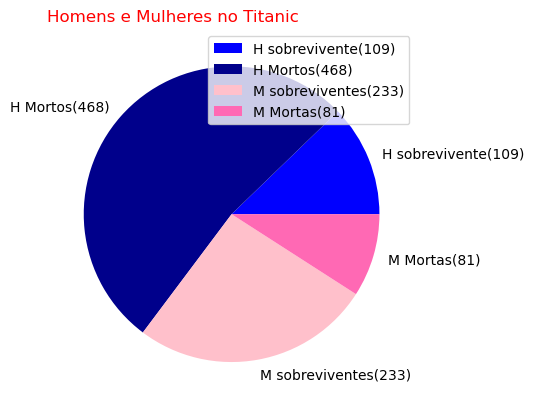

In [87]:
# % de homens que sobreviveu x mulheres grafico de pizza
sexos = df['sex'].value_counts()

# % homens sobreviventes
h_sobreviventes = df.loc[(df['sex'] == 'male') & (df['survived'] == 1), 'survived'].count()
h_morreram = sexos['male'] - h_sobreviventes

# % mulheres sobreviventes

m_sobreviventes = df.loc[(df['sex'] == 'female') & (df['survived'] == 1), 'survived'].count()
m_morreram = sexos['female'] - m_sobreviventes

plotados = [h_sobreviventes, h_morreram, m_sobreviventes, m_morreram]
nomes = ["H sobrevivente(109)", "H Mortos(468)", "M sobreviventes(233)", "M Mortas(81)"]
cores = ["b", "darkblue", "pink", "hotpink"]

# Gráfico
plt.pie(plotados, labels=nomes, colors=cores)
plt.title('Homens e Mulheres no Titanic', loc='left', color="red")
plt.legend()

# Analisando as porcentagens
p_homens   = (h_sobreviventes/sexos['male'] * 100).round(1)
p_mulheres = (m_sobreviventes/sexos['female'] * 100).round(1)

print(f'Porcentagem de sobrevivencia dos Homens: {p_homens}%')
print(f'Porcentagem de sobrevivencia das mulheres: {p_mulheres}%')

In [84]:
# sera que a maioria dos mortos foi entre homens adultos? 
h_morreram = sexos['male'] - h_sobreviventes
m_morreram = sexos['female'] - m_sobreviventes

# Pegar a quantidade de hoemens com mais de 20 anos que morreram e comparar com a quantidade total de mortos
h_morreram_mais_de_20_anos = df.loc[(df['sex'] == 'male') & (df['age'] >= 20) & (df['survived'] == 0), 'survived'].count()
p_h_mais_20_anos_mortos  = (h_morreram_mais_de_20_anos /h_morreram * 100).round(1)
assert p_h_mais_20_anos_mortos == 63.5

# Fazendo a mesma coisa com as mulheres
m_morreram_mais_de_20_anos = df.loc[(df['sex'] == 'female') & (df['age'] >= 20) & (df['survived'] == 0), 'survived'].count()
p_m_mais_20_anos_mortos  = (m_morreram_mais_de_20_anos /m_morreram * 100).round(1)
assert p_m_mais_20_anos_mortos == 51.9

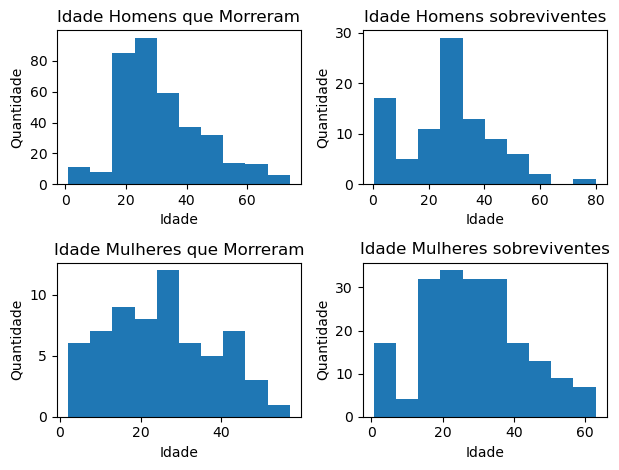

In [82]:
# Plotar um gráfico de idade dos que morreram e sobreviveram, vou fazer 4 gráficos
idades_homens_que_morreram = df.loc[(df['survived'] == 0) & (df['sex'] == 'male'), 'age']
idades_homens_que_sobreviventes = df.loc[(df['survived'] == 1) & (df['sex'] == 'male'), 'age']

idades_mulheres_que_morreram = df.loc[(df['survived'] == 0) & (df['sex'] == 'female'), 'age']
idades_mulheres_que_sobreviventes = df.loc[(df['survived'] == 1) & (df['sex'] == 'female'), 'age']

plt.subplot(2,2,1)
plt.hist(idades_homens_que_morreram)
plt.title("Idade Homens que Morreram")
plt.xlabel("Idade")
plt.ylabel("Quantidade")

plt.subplot(2,2,2)
plt.hist(idades_homens_que_sobreviventes)
plt.title("Idade Homens sobreviventes")
plt.xlabel("Idade")
plt.ylabel("Quantidade")

plt.subplot(2,2,3)
plt.hist(idades_mulheres_que_morreram)
plt.title("Idade Mulheres que Morreram")
plt.xlabel("Idade")
plt.ylabel("Quantidade")

plt.subplot(2,2,4)
plt.hist(idades_mulheres_que_sobreviventes)
plt.title("Idade Mulheres sobreviventes")
plt.xlabel("Idade")
plt.ylabel("Quantidade")

plt.tight_layout()
plt.show()

# Conclusão
A maioria dos hoemens que morreram era adultos, em contrpartida, as mulheres mortas tinham idades mais
 "balanceadas", embora, em porcentagem, tenham morrido mais mulheres cm mais de 40 anos que homens
Morreram muito mais homens que mulheres, tanto em valores absolutos, como relativos
Boa Parte dos sobreviventes homens eram crianças
Mesmo tendo o dobro de homens no navio, a quantidade de sobreviventes homens foi apenas a metade da de mulheres

 . Porcentagem de sobrevivencia dos Homens: 18.9% 
 . Porcentagem de sobrevivencia das mulheres: 74.2%